# GlideinMonitor Performance Analysis

### Import required libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load data

In [8]:
data = pd.read_csv('/opt/GlideinWMS/glideinmonitor/glideinmonitor/indexer/profilerTimes.csv', sep=',', header=0)
data.head()

,Num_Jobs,Non 1,Non 2,Non 3,Compress Time 1,Compress Time 2,Compress Time 3
0,10.0,0.034158,0.033812,0.036444,0.149586,0.148597,0.147488
1,20.0,0.052339,0.052639,0.136996,0.245315,0.245817,0.243802
2,30.0,0.074204,0.069155,0.071229,0.365129,0.344740,0.343279
3,40.0,0.089663,0.090442,0.088672,0.439476,0.484387,0.438971
4,50.0,0.107743,0.102786,0.104281,0.538682,0.535879,0.535271


### Prepare data

In [12]:
data["avg_time_noncompress"] = data.iloc[:, 1:4].mean(axis=1)
data["avg_time_compress"] = data.iloc[:, 4:7].mean(axis=1)
data

,Num_Jobs,Non 1,Non 2,Non 3,Compress Time 1,Compress Time 2,Compress Time 3,avg_time_compress,avg_time_noncompress
0,10.0,0.034158,0.033812,0.036444,0.149586,0.148597,0.147488,0.148557,0.034804
1,20.0,0.052339,0.052639,0.136996,0.245315,0.245817,0.243802,0.244978,0.080658
2,30.0,0.074204,0.069155,0.071229,0.365129,0.344740,0.343279,0.351050,0.071529
3,40.0,0.089663,0.090442,0.088672,0.439476,0.484387,0.438971,0.454278,0.089592
4,50.0,0.107743,0.102786,0.104281,0.538682,0.535879,0.535271,0.536611,0.104937
5,60.0,0.122359,0.128452,0.123483,0.644411,0.645210,0.638592,0.642738,0.124765
6,70.0,0.136784,0.142661,0.142974,0.735603,0.795960,0.730774,0.754113,0.140807
7,80.0,0.162229,0.158827,0.159297,0.820742,0.819072,0.819028,0.819614,0.160117
8,90.0,0.213670,0.175341,0.176920,0.925432,0.921553,0.915333,0.920773,0.188644
9,100.0,0.188129,0.189348,0.240272,1.020206,1.019806,1.025877,1.021963,0.205916


### Analyze data

<Axes: >

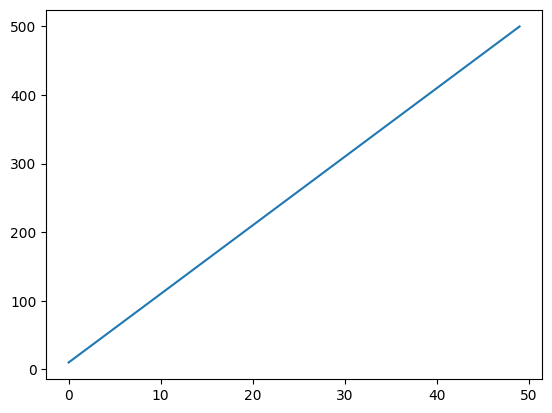

In [13]:
# Plot number of files increase rate
data["Num_Jobs"].plot()

Text(0.5, 0, 'Number of Jobs')

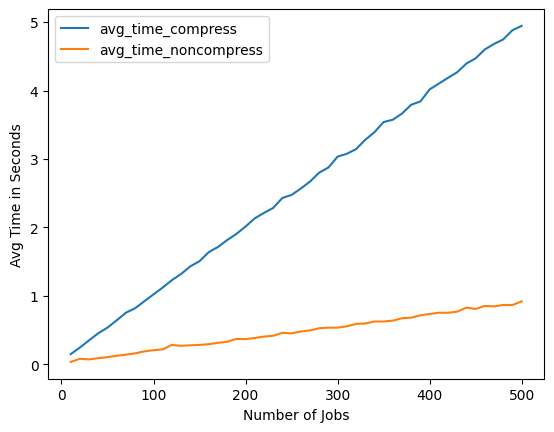

In [31]:
ax = data[["avg_time_compress","avg_time_noncompress","Num_Jobs"]].plot(x = "Num_Jobs")
ax.set_ylabel("Avg Time in Seconds")
ax.set_xlabel("Number of Jobs")

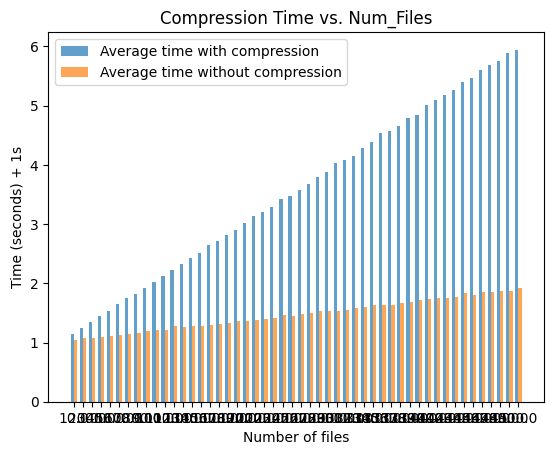

In [14]:
# Plot histograms

width = 0.35
x = np.arange(len(data))

fig, ax = plt.subplots()
ax.bar(x - width / 2, data['avg_time_compress'] + 1, width=width, align='center', alpha=0.7, label='Average time with compression')
ax.bar(x + width / 2, data['avg_time_noncompress'] + 1, width=width, align='center', alpha=0.7, label='Average time without compression')
ax.set_xlabel('Number of files')
ax.set_xticks(x)
ax.set_xticklabels(data['Num_Jobs'])
ax.set_ylabel('Time (seconds) + 1s')
ax.set_title('Compression Time vs. Num_Files')
ax.legend()
plt.show()

In [15]:
data["Compress Time 2"]

0     0.148597
1     0.245817
2     0.344740
3     0.484387
4     0.535879
5     0.645210
6     0.795960
7     0.819072
8     0.921553
9     1.019806
10    1.127205
11    1.267127
12    1.343697
13    1.476605
14    1.481027
15    1.693884
16    1.683800
17    1.787549
18    1.875897
19    1.979351
20    2.144530
21    2.249014
22    2.261926
23    2.497528
24    2.511837
25    2.620071
26    2.713750
27    2.809047
28    2.854901
29    3.003009
30    3.039238
31    3.163625
32    3.248154
33    3.403083
34    3.509614
35    3.528432
36    3.665763
37    3.828638
38    3.836085
39    3.975240
40    4.104400
41    4.196567
42    4.273636
43    4.363695
44    4.419378
45    4.595030
46    4.627983
47    4.767833
48    4.857467
49    4.935490
Name: Compress Time 2, dtype: float64